In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import random
from skmultiflow.meta import LearnPPNSEClassifier

import matplotlib.pyplot as plt

In [133]:
# Valeurs d'après : Concept Drift Adaptation by exploiting historical knowledge
#                   Yu Sun, Ke Tang, Zexuan Zhu, Xin Yao, 2018
# Circle Concepts (CIR) [14], [27] apply a circle as the decision boundary in a 2-D feature space and simulates the concept drift by changing the radius of the circle, that is
# (x1 − a)2 + (x2 − b)2 ≤ / > θ. a = 0, b = 0
# In the experiment, data points are generated evenly locating between −5 and 5 for both dimensions, and the radius value of θ changes every 25 data chunks.

# All of the synthetic data streams are generated with 120 data chunks with 10% noise introduced.
# For synthetic data streams, two chunks of data are generated at each learning step. The first data chunk is used for training and the other one is used to test the current prediction model.

def circles(theta, n_samples, noise=False):
    x1 = [random.random()*10-5 for i in range(n_samples)]
    x2 = [random.random()*10-5 for i in range(n_samples)]
    df = pd.DataFrame(x1, columns=['x1'])
    df['x2'] = x2
    y = ((df['x1']**2+df['x2']**2) > theta).astype(int)
    if noise:
        for i in y.sample(frac=0.1).index:
            y.loc[i] = random.randint(0, 1)
    y = y.to_numpy()
    df = df.to_numpy()
    return df, y

def circles_(theta_, n_samples=200, noise=False):
    x1 = [random.random()*10-5 for i in range(n_samples)]
    x2 = [random.random()*10-5 for i in range(n_samples)]
    df = pd.DataFrame(x1, columns=['x1'])
    df['x2'] = x2
    y = []
    for i in range(200):
        theta = theta_[i//25]
        y.append(((df['x1'][i]**2+df['x2'][i]**2)>theta).astype(int))
    y = pd.Series(y)
    if noise:
        for i in y.sample(frac=0.1).index:
            y.loc[i] = random.randint(0, 1)
    y = y.to_numpy()
    df = df.to_numpy()
    return df, y

In [114]:
# Valeurs d'après : Concept Drift Adaptation by exploiting historical knowledge
#                   Yu Sun, Ke Tang, Zexuan Zhu, Xin Yao, 2018
thetas_a = [3, 2, 1, 2, 3, 4, 5, 4]
thetas_g = [3, 2.5, 2, 2.5, 3, 3.5, 4, 3.5]

In [115]:
24000//200

120

0.8860333333333333
CPU times: user 2min 31s, sys: 362 ms, total: 2min 32s
Wall time: 2min 31s


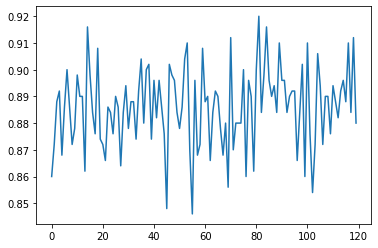

In [11]:
%%time
# Gradual 500, 10% random in training set.

r = []
correct_cnt = 0
size = 200
learn_pp_nse = LearnPPNSEClassifier(pruning='error', n_estimators=25, window_size=1000)
theta = thetas_g[0]
for i in range(120):
    X, y = circles(theta, size, noise=True)
    y_pred = learn_pp_nse.predict(X)
    correct_cnt += sum(y == y_pred)
    r.append(sum(y == y_pred)/size)
    
    theta = thetas_g[i//25]
    X, y = circles(theta, size, noise=True)
    learn_pp_nse = learn_pp_nse.partial_fit(X, y, classes=[0, 1])
print(correct_cnt/(120*size))
plt.plot(r)


0.85325
CPU times: user 52.9 s, sys: 37.6 ms, total: 53 s
Wall time: 53 s


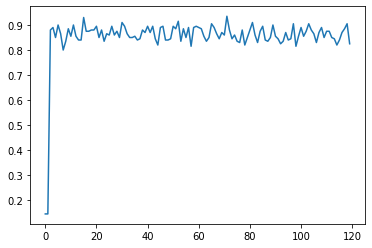

In [142]:
%%time
# Gradual 500, 10% random in training set.

r = []
correct_cnt = 0
size = 200
learn_pp_nse = LearnPPNSEClassifier(pruning='error', n_estimators=25)
theta = thetas_g[0]
for i in range(120):
    # scoring
    X, y = circles_(thetas_a, size, noise=True)
    y_pred = learn_pp_nse.predict(X)
    correct_cnt += sum(y == y_pred)
    r.append(sum(y == y_pred)/size)
    # apprentissage
    X, y = circles_(thetas_a, size, noise=True)
    learn_pp_nse = learn_pp_nse.partial_fit(X, y, classes=[0, 1])
print(correct_cnt/(120*size))
plt.plot(r)

